In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# **DATA**

In [4]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [5]:
df.shape

(200, 5)

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [52]:
X = df.iloc[:,[3,4]].values

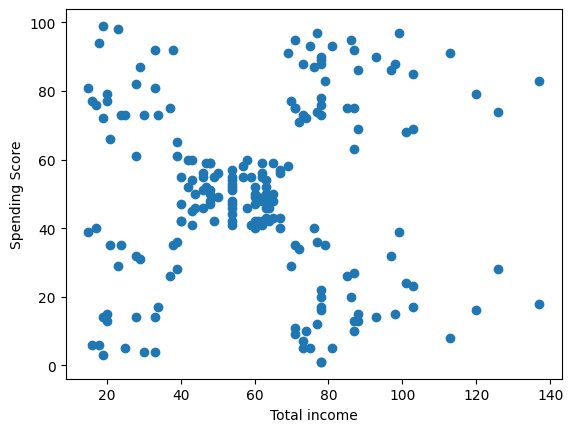

In [53]:
plt.scatter(X[...,0],X[...,1])
plt.xlabel("Total income")
plt.ylabel("Spending Score")
plt.show()

# DENDROGRAM for Hierarachy

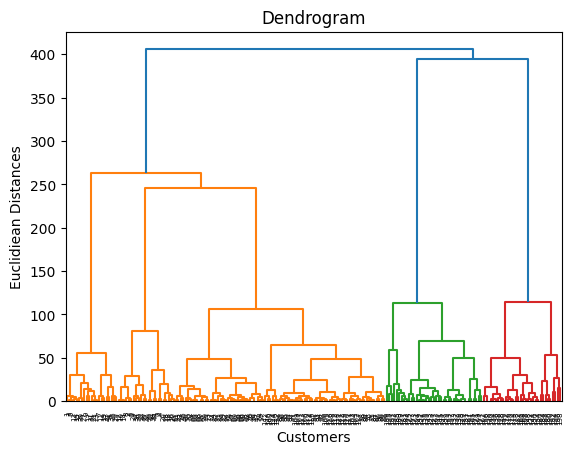

In [54]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidiean Distances')
plt.show()

# AGGLOMERATIVE CLUSTERING

In [55]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
Y_hc = hc.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [56]:
Y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

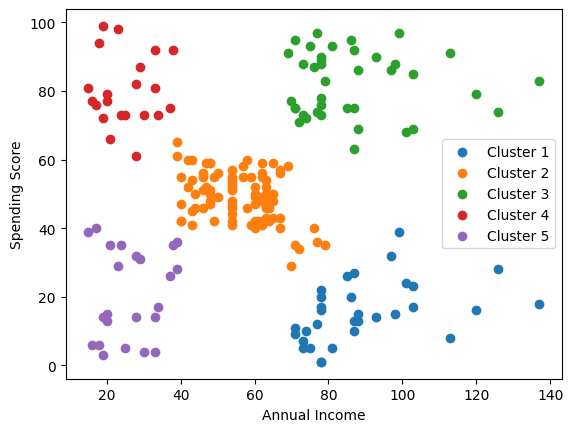

In [57]:
plt.scatter(X[Y_hc == 0,0],X[Y_hc == 0,1],label='Cluster 1')
plt.scatter(X[Y_hc == 1,0],X[Y_hc == 1,1],label='Cluster 2')
plt.scatter(X[Y_hc == 2,0],X[Y_hc == 2,1],label='Cluster 3')
plt.scatter(X[Y_hc == 3,0],X[Y_hc == 3,1],label='Cluster 4')
plt.scatter(X[Y_hc == 4,0],X[Y_hc == 4,1],label='Cluster 5')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

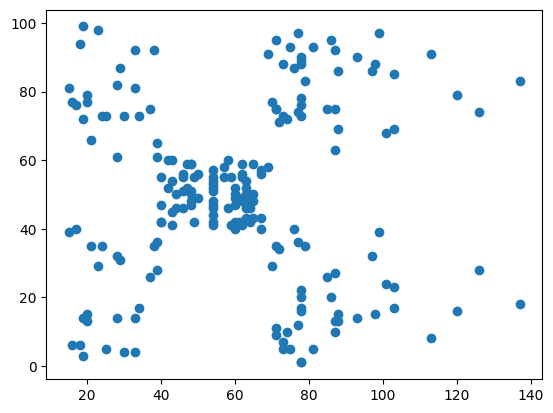

In [58]:
plt.scatter(X[...,0], X[...,1])
plt.show()

In [59]:
df['Target'] = Y_hc
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Target
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


# **SAVE the MODEL**

In [60]:
import joblib

In [61]:
joblib.dump(hc, "Customer_segmentation")

['Customer_segmentation']

# **PREDICTION**

In [63]:
import ipywidgets as widgets
from IPython.display import display

In [82]:
model = joblib.load("Customer_segmentation")

In [83]:
def predict_cluster(b):
  income = float(income_input.value)
  spending_score = float(spending_input.value)

  prediction = model.fit_predict([[income, spending_score]])
  # prediction = hc.labels_

  result_label.value = f"predicted Cluster: {prediction[0]}"

income_input = widgets.FloatText(description = "Annual Income:")
spending_input = widgets.FloatText(description = "Spending Score")
predict_button = widgets.Button(description = "Predict")
result_label = widgets.Label(value = "Predicted Cluster:- ")

predict_button.on_click(predict_cluster)

display(income_input, spending_input, predict_button, result_label)

FloatText(value=0.0, description='Annual Income:')

FloatText(value=0.0, description='Spending Score')

Button(description='Predict', style=ButtonStyle())

Label(value='Predicted Cluster:- ')

AttributeError: 'numpy.ndarray' object has no attribute 'fit_predict'

In [72]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Silhouette Score
silhouette_agg = silhouette_score(X, Y_hc)

# Davies-Bouldin Index
davies_bouldin_agg = davies_bouldin_score(X, Y_hc)

print("Hierarchical Clustering Silhouette Score:", silhouette_agg)
print("Hierarchical Clustering Davies-Bouldin Index:", davies_bouldin_agg)

Hierarchical Clustering Silhouette Score: 0.5529945955148897
Hierarchical Clustering Davies-Bouldin Index: 0.5782207452369454


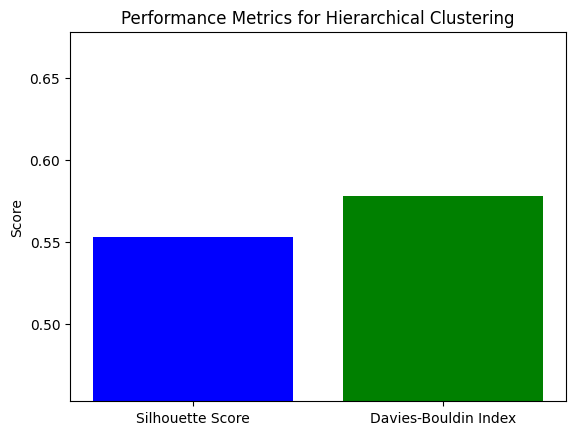

In [73]:
metrics_agg = ['Silhouette Score', 'Davies-Bouldin Index']
values_agg = [silhouette_agg, davies_bouldin_agg]

# Plotting the bar graph
plt.bar(metrics_agg, values_agg, color=['blue', 'green'])
plt.ylabel('Score')
plt.title('Performance Metrics for Hierarchical Clustering')
plt.ylim(min(values_agg) - 0.1, max(values_agg) + 0.1)  # Adjust the y-axis limits for better visualization
plt.show()